In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [2]:
baseball_win=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv")
baseball_win

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


## Data preparation and EDA

In [3]:
baseball_win.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [4]:
baseball_win.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


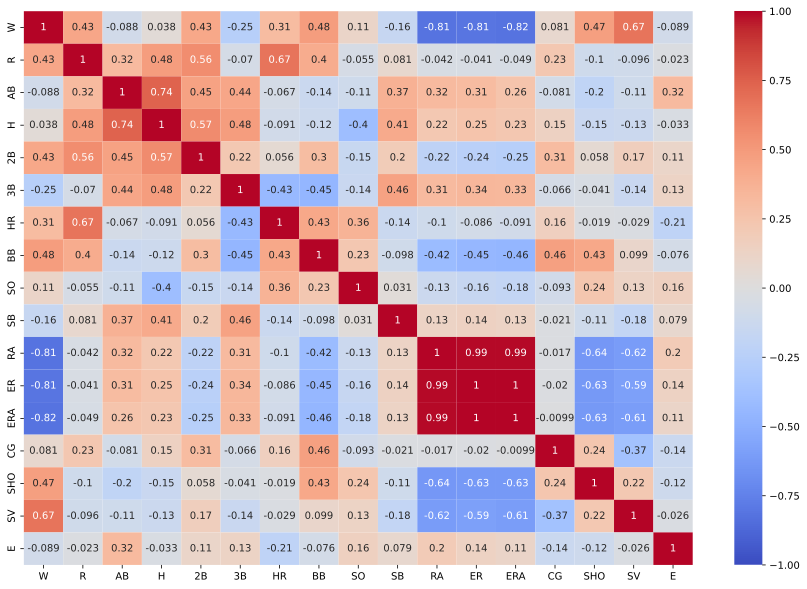

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(data=baseball_win.corr(),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1);

## Feature Engineering

In [6]:
def compute_vif(X):
    vif=pd.Series(index=X.columns.values)
    for i,col in enumerate(X.columns.values):
        vif[col]=variance_inflation_factor(exog=X.values,
                                        exog_idx=i)
    return vif.sort_values(ascending=False)

In [7]:
X,y=baseball_win.drop(columns=['W'],
                      axis=1),baseball_win.W
features_to_drop=[]
X_copy=X.copy()
while 1:
    vif=compute_vif(X_copy)
    max_vif=vif.max()
    if max_vif>10:
        features_to_drop.append(vif.idxmax())
        X_copy=X_copy.drop(columns=vif.idxmax())
    else:
        break
X=X.drop(columns=features_to_drop,
         axis=1)

## Model building

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               shuffle=True,
                                               random_state=42)

In [9]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
print(f'Training r-squared: {lr.score(X_train_scaled,y_train)}')
print(f'Test r-squared: {lr.score(X_test_scaled,y_test)}')

Training r-squared: 0.3075794440326446
Test r-squared: 0.19800261621299076


In [11]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
print(f'Training r-squared: {lasso.score(X_train_scaled,y_train)}')
print(f'Test r-squared: {lasso.score(X_test_scaled,y_test)}')


Training r-squared: 0.066890460360439
Test r-squared: -0.13968058799850191


In [12]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
print(f'Training r-squared: {ridge.score(X_train_scaled,y_train)}')
print(f'Test r-squared: {ridge.score(X_test_scaled,y_test)}')

Training r-squared: 0.27560569338589513
Test r-squared: 0.06703013644042244


In [13]:
en=ElasticNet()
en.fit(X_train_scaled,y_train)
print(f'Training r-squared: {en.score(X_train_scaled,y_train)}')
print(f'Test r-squared: {en.score(X_test_scaled,y_test)}')

Training r-squared: 0.05051392181882064
Test r-squared: -0.07380732712091276


### Final model with least over fitting is the Linear Regression model